# 第5章: 係り受け解析
『吾輩は猫である』に係り受け解析器CaboChaを適用し，係り受け木の操作と統語的な分析を体験します．

- クラス, 係り受け解析, CaboCha, 文節, 係り受け, 格, 機能動詞構文, 係り受けパス, Graphviz

夏目漱石の小説『吾輩は猫である』の文章（[neko.txt](http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt)）をCaboChaを使って係り受け解析し，その結果をneko.txt.cabochaというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

In [1]:
#!brew install cabocha

In [2]:
!head -5 neko.txt

一

　吾輩は猫である。
名前はまだ無い。



In [3]:
!head -5 neko.txt | cabocha

一
EOS
EOS
        　---D
      吾輩は-D
    猫である。
EOS
名前は---D
    まだ-D
    無い。
EOS
EOS


https://taku910.github.io/cabocha/
によると、 `-f1`オプションでcsv形式の出力になる様子。

In [4]:
!head -5 neko.txt | cabocha -f1

* 0 -1D 0/0 0.000000
一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
* 0 2D 0/0 -0.764522
　	記号,空白,*,*,*,*,　,　,　
* 1 2D 0/1 -0.764522
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 2 -1D 0/2 0.000000
猫	名詞,一般,*,*,*,*,猫,ネコ,ネコ
で	助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ
ある	助動詞,*,*,*,五段・ラ行アル,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
EOS
* 0 2D 0/1 -1.911675
名前	名詞,一般,*,*,*,*,名前,ナマエ,ナマエ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 1 2D 0/0 -1.911675
まだ	副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ
* 2 -1D 0/0 0.000000
無い	形容詞,自立,*,*,形容詞・アウオ段,基本形,無い,ナイ,ナイ
。	記号,句点,*,*,*,*,。,。,。
EOS
EOS


In [5]:
!cat neko.txt | cabocha -f1 > neko.txt.cabocha

In [6]:
!head -10 neko.txt.cabocha

* 0 -1D 0/0 0.000000
一	名詞,数,*,*,*,*,一,イチ,イチ
EOS
EOS
* 0 2D 0/0 -0.764522
　	記号,空白,*,*,*,*,　,　,　
* 1 2D 0/1 -0.764522
吾輩	名詞,代名詞,一般,*,*,*,吾輩,ワガハイ,ワガハイ
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
* 2 -1D 0/2 0.000000


## 40. 係り受け解析結果の読み込み（形態素）
形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，CaboChaの解析結果（neko.txt.cabocha）を読み込み，各文をMorphオブジェクトのリストとして表現し，3文目の形態素列を表示せよ．

In [59]:
import re

class Morph:
    def __init__(self, surface, base, pos, pos1):
        self.surface = surface
        self.base = base
        self.pos = pos
        self.pos1 = pos1
    
    def __repr__(self):
        return f'Morph({self.surface}, {self.base}, {self.pos}, {self.pos1})'
    
    __str__ = __repr__

    RE_CABOCHA_LINE = r"""
    (?P<surface>[^,]+)\t
    (?P<pos>[^,]+),
    (?P<pos1>[^,]+),
    (?P<pos2>[^,]+),
    (?P<pos3>[^,]+),
    (?P<conjtype>[^,]+),
    (?P<form>[^,]+),
    (?P<base>[^,]+)
    (
        ,(?P<kana>[^,]+)
        ,(?P<sound>[^,]+)
    )?
    """
    @classmethod
    def from_cabocha_line(cls, line):
        line = line.rstrip()
        m = re.match(cls.RE_CABOCHA_LINE, line, re.VERBOSE)
        if m:
            return cls(m.group('surface'), m.group('base'), m.group('pos'), m.group('pos1'))
        else:
            return None
    
    @property
    def is_sign(self):
        """
        42, 43で使用
        """
        return self.pos == '記号'


In [60]:
sentences = []
sentence = []
with open('neko.txt.cabocha') as f:
    for line in f:
        # 末尾の改行除去
        line = line.rstrip()
        if line == 'EOS':
            sentences.append(sentence)
            sentence = []
        else:
            m = Morph.from_cabocha_line(line)
            if m:
                sentence.append(m)

In [61]:
sentences[:6]

[[Morph(一, 一, 名詞, 数)],
 [],
 [Morph(　, 　, 記号, 空白),
  Morph(吾輩, 吾輩, 名詞, 代名詞),
  Morph(は, は, 助詞, 係助詞),
  Morph(猫, 猫, 名詞, 一般),
  Morph(で, だ, 助動詞, *),
  Morph(ある, ある, 助動詞, *),
  Morph(。, 。, 記号, 句点)],
 [Morph(名前, 名前, 名詞, 一般),
  Morph(は, は, 助詞, 係助詞),
  Morph(まだ, まだ, 副詞, 助詞類接続),
  Morph(無い, 無い, 形容詞, 自立),
  Morph(。, 。, 記号, 句点)],
 [],
 [Morph(　, 　, 記号, 空白),
  Morph(どこ, どこ, 名詞, 代名詞),
  Morph(で, で, 助詞, 格助詞),
  Morph(生れ, 生れる, 動詞, 自立),
  Morph(た, た, 助動詞, *),
  Morph(か, か, 助詞, 副助詞／並立助詞／終助詞),
  Morph(とんと, とんと, 副詞, 一般),
  Morph(見当, 見当, 名詞, サ変接続),
  Morph(が, が, 助詞, 格助詞),
  Morph(つか, つく, 動詞, 自立),
  Morph(ぬ, ぬ, 助動詞, *),
  Morph(。, 。, 記号, 句点)]]

In [62]:
sentences[5]

[Morph(　, 　, 記号, 空白),
 Morph(どこ, どこ, 名詞, 代名詞),
 Morph(で, で, 助詞, 格助詞),
 Morph(生れ, 生れる, 動詞, 自立),
 Morph(た, た, 助動詞, *),
 Morph(か, か, 助詞, 副助詞／並立助詞／終助詞),
 Morph(とんと, とんと, 副詞, 一般),
 Morph(見当, 見当, 名詞, サ変接続),
 Morph(が, が, 助詞, 格助詞),
 Morph(つか, つく, 動詞, 自立),
 Morph(ぬ, ぬ, 助動詞, *),
 Morph(。, 。, 記号, 句点)]

## 41. 係り受け解析結果の読み込み（文節・係り受け）
40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストのCaboChaの解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，8文目の文節の文字列と係り先を表示せよ．第5章の残りの問題では，ここで作ったプログラムを活用せよ．

In [117]:
EOS = 'EOS'

class Chunk:
    def __init__(self, dst):
        self.morphs = []
        self.dst = int(dst)
        self.srcs = []
    
    RE_CABOCHA_LINE = r'\* \d+ (?P<dst>-?\d+)D \d+/\d+ -?\d+(\.\d*)?'
    @classmethod
    def from_cabocha_line(cls, line, current_chunk=None):
        line = line.rstrip()
        if line == 'EOS':
            return EOS
        
        m = re.match(cls.RE_CABOCHA_LINE, line)
        if m:
            return Chunk(m.group('dst'))
        
        m = Morph.from_cabocha_line(line)
        assert m is not None
        current_chunk.morphs.append(m)
    
    @property
    def surface(self):
        return ''.join(map(lambda m: m.surface, self.morphs))
    
    @property
    def morphs_wo_signs(self):
        """
        42, 43で使用
        """
        return [m for m in self.morphs if not m.is_sign]

    def wo_signs(self):
        """
        42, 43で使用
        """
        chunk = type(self)(dst=self.dst)
        chunk.morphs = self.morphs_wo_signs
        chunk.srcs = self.srcs
        return chunk
    
    def __bool__(self):
        return bool(self.morphs)
    
    def __repr__(self):
        return f'Chunk(surface={repr(self.surface)}, dst={self.dst}, srcs={self.srcs})'
    __str__ = __repr__


In [118]:
sentences = []
sentence = []
current_chunk = None
with open('neko.txt.cabocha') as f:
    for line in f:
        ret = Chunk.from_cabocha_line(line, current_chunk=current_chunk)
        if ret == EOS:
            sentences.append(sentence)
            sentence = []
            current_chunk = None
        elif isinstance(ret, Chunk):
            sentence.append(ret)
            current_chunk = ret

In [119]:
def set_srcs(sentence):
    for i_chunk in range(len(sentence)):
        chunk = sentence[i_chunk]
        if chunk.dst != -1:
            sentence[chunk.dst].srcs.append(i_chunk)

In [120]:
for sentence in sentences:
    set_srcs(sentence)

In [121]:
sentences[8 + 1]

[Chunk(surface='この', dst=1, srcs=[]),
 Chunk(surface='書生というのは', dst=7, srcs=[0]),
 Chunk(surface='時々', dst=4, srcs=[]),
 Chunk(surface='我々を', dst=4, srcs=[]),
 Chunk(surface='捕えて', dst=5, srcs=[2, 3]),
 Chunk(surface='煮て', dst=6, srcs=[4]),
 Chunk(surface='食うという', dst=7, srcs=[5]),
 Chunk(surface='話である。', dst=-1, srcs=[1, 6])]

## 42. 係り元と係り先の文節の表示
係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [122]:
deps = [
    (chunk, sentence[chunk.dst]) 
    for sentence in sentences 
    for chunk in sentence 
    if chunk.dst != -1
]

In [123]:
deps[:5]

[(Chunk(surface='\u3000', dst=2, srcs=[]),
  Chunk(surface='猫である。', dst=-1, srcs=[0, 1])),
 (Chunk(surface='吾輩は', dst=2, srcs=[]),
  Chunk(surface='猫である。', dst=-1, srcs=[0, 1])),
 (Chunk(surface='名前は', dst=2, srcs=[]),
  Chunk(surface='無い。', dst=-1, srcs=[0, 1])),
 (Chunk(surface='まだ', dst=2, srcs=[]),
  Chunk(surface='無い。', dst=-1, srcs=[0, 1])),
 (Chunk(surface='\u3000どこで', dst=1, srcs=[]),
  Chunk(surface='生れたか', dst=4, srcs=[0]))]

In [126]:
deps_wo_signs = ((src.wo_signs(), dst.wo_signs()) for src, dst in deps)
# いずれかが空文字列なら削除
deps_wo_signs = list(filter(all, deps_wo_signs))
deps_wo_signs[:10]

[(Chunk(surface='吾輩は', dst=2, srcs=[]),
  Chunk(surface='猫である', dst=-1, srcs=[0, 1])),
 (Chunk(surface='名前は', dst=2, srcs=[]),
  Chunk(surface='無い', dst=-1, srcs=[0, 1])),
 (Chunk(surface='まだ', dst=2, srcs=[]),
  Chunk(surface='無い', dst=-1, srcs=[0, 1])),
 (Chunk(surface='どこで', dst=1, srcs=[]),
  Chunk(surface='生れたか', dst=4, srcs=[0])),
 (Chunk(surface='生れたか', dst=4, srcs=[0]),
  Chunk(surface='つかぬ', dst=-1, srcs=[1, 2, 3])),
 (Chunk(surface='とんと', dst=4, srcs=[]),
  Chunk(surface='つかぬ', dst=-1, srcs=[1, 2, 3])),
 (Chunk(surface='見当が', dst=4, srcs=[]),
  Chunk(surface='つかぬ', dst=-1, srcs=[1, 2, 3])),
 (Chunk(surface='何でも', dst=1, srcs=[]), Chunk(surface='薄暗い', dst=3, srcs=[0])),
 (Chunk(surface='薄暗い', dst=3, srcs=[0]),
  Chunk(surface='所で', dst=5, srcs=[1, 2])),
 (Chunk(surface='じめじめした', dst=3, srcs=[]),
  Chunk(surface='所で', dst=5, srcs=[1, 2]))]

In [131]:
def dep2tsv(dep):
    surfaces = map(lambda c: c.surface, dep)
    return '\t'.join(surfaces)
def deps2tsv(deps):
    return '\n'.join(map(dep2tsv, deps))

In [132]:
deps_tsv = deps2tsv(deps_wo_signs)

In [133]:
deps_tsv.splitlines()[:20]

['吾輩は\t猫である',
 '名前は\t無い',
 'まだ\t無い',
 'どこで\t生れたか',
 '生れたか\tつかぬ',
 'とんと\tつかぬ',
 '見当が\tつかぬ',
 '何でも\t薄暗い',
 '薄暗い\t所で',
 'じめじめした\t所で',
 '所で\t泣いて',
 'ニャーニャー\t泣いて',
 '泣いて\t記憶している',
 'いた事だけは\t記憶している',
 '吾輩は\t見た',
 'ここで\t始めて',
 '始めて\t人間という',
 '人間という\tものを',
 'ものを\t見た',
 'しかも\t種族であったそうだ']

## 43. 名詞を含む文節が動詞を含む文節に係るものを抽出
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [140]:
def contains_pos(chunk, pos):
    a = list(filter(lambda m: m.pos == pos, chunk.morphs))
    return bool(a)

def is_sv(dep):
    src, dst = dep
    return contains_pos(src, '名詞') and contains_pos(dst, '動詞')

svs = list(filter(is_sv, deps_wo_signs))
svs_tsv = deps2tsv(svs)
svs_tsv.splitlines()[:20]

['どこで\t生れたか',
 '見当が\tつかぬ',
 '所で\t泣いて',
 'ニャーニャー\t泣いて',
 'いた事だけは\t記憶している',
 '吾輩は\t見た',
 'ここで\t始めて',
 'ものを\t見た',
 'あとで\t聞くと',
 '我々を\t捕えて',
 '掌に\t載せられて',
 'スーと\t持ち上げられた',
 '時\tフワフワした',
 '感じが\tあったばかりである',
 '上で\t落ちついて',
 '顔を\t見たのが',
 'ものの\t見始であろう',
 'ものだと\t思った',
 '感じが\t残っている',
 '今でも\t残っている']

## 44. 係り受け木の可視化
与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，係り受け木をDOT言語に変換し，Graphvizを用いるとよい．また，Pythonから有向グラフを直接的に可視化するには，pydotを使うとよい．

In [152]:
import pydot
from IPython.display import SVG

pydot.Nodeのプロパティについては
http://www.graphviz.org/doc/info/attrs.html
を、notebook上にinlineで表示させる方法は
https://qiita.com/horihori49/items/0c79bb2d9e5209713eed
を、それぞれ参考にした。

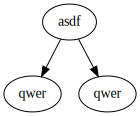

In [171]:
dot = pydot.Dot()
a = pydot.Node('asdf')
b = pydot.Node('a', label="qwer")
c = pydot.Node('b', label="qwer")

dot.add_node(a)
dot.add_node(b)

dot.add_node(c)

dot.add_edge(pydot.Edge(a, b))
dot.add_edge(pydot.Edge(a, c))
SVG(dot.create(format='svg'))

In [174]:
def sentence2tree(sentence):
    dot = pydot.Dot()
    nodes = [pydot.Node(str(i), label=chunk.surface) for i, chunk in enumerate(sentence)]
    edges = [pydot.Edge(str(i), str(chunk.dst)) for i, chunk in enumerate(sentence) if chunk.dst != -1]
    for node in nodes:
        dot.add_node(node)
    for edge in edges:
        dot.add_edge(edge)
    return SVG(dot.create(format='svg'))
        

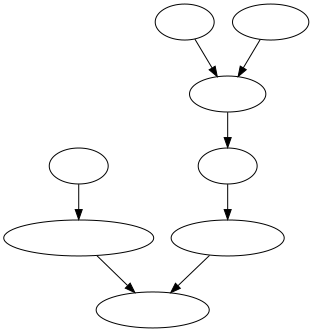

In [175]:
sentence2tree(sentences[9])

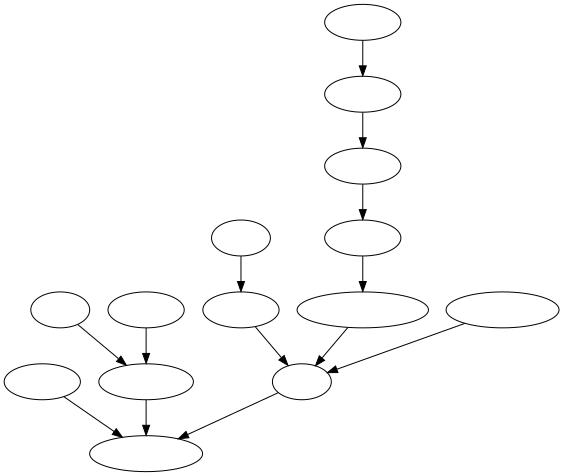

In [176]:
sentence2tree(sentences[100])

## 45. 動詞の格パターンの抽出
今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．

- 動詞を含む文節において，最左の動詞の基本形を述語とする
- 述語に係る助詞を格とする
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる

「吾輩はここで始めて人間というものを見た」という例文（neko.txt.cabochaの8文目）を考える． この文は「始める」と「見る」の２つの動詞を含み，「始める」に係る文節は「ここで」，「見る」に係る文節は「吾輩は」と「ものを」と解析された場合は，次のような出力になるはずである．

```
始める  で
見る    は を
```

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

- コーパス中で頻出する述語と格パターンの組み合わせ
- 「する」「見る」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [225]:
def get_first_verb(chunk):
    for m in chunk.morphs:
        if m.pos == '動詞':
            return m.base
    return None

def get_last_particle(chunk):
    for m in reversed(chunk.morphs):
        if m.pos == '助詞':
            return m.base
    return None

def extract_verb_src_pairs(sentence):
    # 動詞を含む文節において，最左の動詞の基本形を述語とする
    chunks_with_verbs = [(chunk, get_first_verb(chunk)) for chunk in sentence]
    chunks_with_verbs = list(filter(lambda x: x[1] is not None, chunks_with_verbs))
    
    # 述語に係る助詞を格とする
    verb_src_pairs = [
        (
            verb_base, 
            [get_last_particle(sentence[i_src]) for i_src in chunk.srcs]
        )
        for chunk, verb_base in chunks_with_verbs
    ]
    verb_src_pairs = list(filter(lambda x: x[1] is not None, verb_src_pairs))
    
    return verb_src_pairs


In [229]:
with open('out_chapter5_45.txt', 'w') as f:
    for sentence in sentences:
        for verb, srcs in extract_verb_src_pairs(sentence):
            # 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
            srcs_sorted = sorted(filter(bool, srcs))
            if srcs_sorted:
                print(verb, ' '.join(srcs_sorted), file=f, sep='\t')

In [230]:
!head out_chapter5_45.txt

生れる	で
つく	か が
泣く	で
する	て は
始める	で
見る	は を
聞く	で
捕える	を
煮る	て
食う	て


In [235]:
# コーパス中で頻出する述語と格パターンの組み合わせ
!sort out_chapter5_45.txt | uniq -c | sort -rn | head -20

 704 云う	と
 452 する	を
 333 思う	と
 202 ある	が
 199 なる	に
 188 する	に
 175 見る	て
 159 する	と
 117 する	が
 113 する	に を
  98 見る	を
  97 見える	と
  90 する	て を
  85 する	は
  61 する	て
  60 する	が を
  60 もつ	を
  59 する	も
  57 ある	の
  56 云う	を
sort: Broken pipe


In [252]:
# 「する」「見る」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）
!cat out_chapter5_45.txt | grep -E '^(する|見る|与える)\t' | sort | uniq -c | sort -rn

 452 する	を
 188 する	に
 175 見る	て
 159 する	と
 117 する	が
 113 する	に を
  98 見る	を
  90 する	て を
  85 する	は
  61 する	て
  60 する	が を
  59 する	も
  51 する	から
  51 する	と を
  46 する	で を
  40 する	の
  39 する	と は
  37 する	から を
  37 する	は を
  36 する	で
  32 する	が に
  32 する	が と
  25 する	と は を
  25 する	に は
  24 する	て に
  23 見る	て て
  20 見る	から
  17 する	が に を
  17 見る	と
  16 する	から に
  15 見る	て を
  15 する	は も
  15 する	て と
  13 見る	て は
  13 する	も を
  13 する	か
  12 見る	から て
  12 する	まで
  12 する	て は を
  12 する	て に を
  12 する	て は
  12 見る	で
  12 する	ば
  11 する	と に は
  11 する	が と を
  11 する	に も
  11 する	に に
  11 する	で と
  11 する	が は
  11 する	が で
  10 する	に は を
  10 する	と に を
  10 する	が で を
  10 する	と も
  10 する	と に
  10 する	が も
   9 する	から は
   9 する	で に
   9 見る	に
   8 する	でも
   8 する	に に を
   8 する	て と を
   8 見る	て と
   8 見る	が
   7 する	まで を
   7 する	から も
   7 する	から が
   7 する	さえ
   7 する	で に を
   7 見る	に を
   7 見る	が を
   7 する	て も
   7 する	へ
   6 する	くらい
   6 する	と に は を
   6 見る	て は を
   6 する	に も を
   6 する	て と は
   6 する	が て を
   6 する	が て に
   6 見る	と を
   6 見る	て も
   6 する	ば を


## 46. 動詞の格フレーム情報の抽出
45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．

- 項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
- 述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる

「吾輩はここで始めて人間というものを見た」という例文（neko.txt.cabochaの8文目）を考える． この文は「始める」と「見る」の２つの動詞を含み，「始める」に係る文節は「ここで」，「見る」に係る文節は「吾輩は」と「ものを」と解析された場合は，次のような出力になるはずである．

```
始める  で      ここで
見る    は を   吾輩は ものを
```

In [260]:
def extract_frame_info(sentence):
    # 動詞を含む文節において，最左の動詞の基本形を述語とする
    chunks_with_verbs = [(chunk, get_first_verb(chunk)) for chunk in sentence]
    chunks_with_verbs = list(filter(lambda x: x[1] is not None, chunks_with_verbs))
    
    # 述語に係る助詞を格とする
    # 項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
    frames = [
        (
            verb_base, 
            [get_last_particle(sentence[i_src]) for i_src in chunk.srcs], 
            [sentence[i_src] for i_src in chunk.srcs]
        )
        for chunk, verb_base in chunks_with_verbs
    ]
    return frames

with open('out_chapter5_46.txt', 'w') as f:
    for sentence in sentences:
        for verb, src_parts, src_chunks in extract_frame_info(sentence):
            # 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
            # 述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる
            srcs = list(zip(src_parts, src_chunks))
            srcs_sorted = sorted(filter(lambda src: src[0] is not None, srcs), key=lambda src: src[0])
            if srcs_sorted:
                src_parts, src_chunks = tuple(zip(*srcs_sorted))
                src_chunks = list(map(lambda c: c.surface, src_chunks))
                print(verb, ' '.join(src_parts), ' '.join(src_chunks), file=f, sep='\t')

In [261]:
!head out_chapter5_46.txt

生れる	で	　どこで
つく	か が	生れたか 見当が
泣く	で	所で
する	て は	泣いて いた事だけは
始める	で	ここで
見る	は を	吾輩は ものを
聞く	で	あとで
捕える	を	我々を
煮る	て	捕えて
食う	て	煮て


## 47. 機能動詞構文のマイニング
動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

- 「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
- 述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
- 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
- 述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）

例えば「別段くるにも及ばんさと、主人は手紙に返事をする。」という文から，以下の出力が得られるはずである．

```
返事をする      と に は        及ばんさと 手紙に 主人は
```

このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．

- コーパス中で頻出する述語（サ変接続名詞+を+動詞）
- コーパス中で頻出する述語と助詞パターン

そもそも、機能動詞構文とは？がよくわからなかったのでぐぐってみた。

https://www.kanjifumi.jp/keyword/kinoudousi/

> 機能動詞（きのうどうし）
>
>「（さそいを）かける」「（連絡を）とる」「（考慮に）いれる」「（においが）する」のように実質的な意味を名詞にあずけて、みずからはもっぱら文法的な機能をはたす動詞。

とのこと。

In [268]:
def is_sahen_noun_plus_wo(chunk):
    if len(chunk.morphs) != 2:
        return False
    return (
        chunk.morphs[0].pos == '名詞' and
        chunk.morphs[0].pos1 == 'サ変接続' and
        chunk.morphs[1].surface == 'を' and
        chunk.morphs[1].pos == '助詞'
    )

def get_pred_no47(chunk, sentence):
    """
    「サ変接続名詞」+「を」が動詞にかかる場合、
    (述語の文字列, 動詞にかかる助詞リスト(辞書順), 動詞にかかる助詞の文節リスト(助詞と同順序)) のtupleを返す。
    条件を満たさない場合や、動詞にかかる助詞がない場合はNoneを返す。
    """
    # 「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
    # 述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
    if not is_sahen_noun_plus_wo(chunk):
        return None
    if chunk.dst == -1:
        return None
    
    verb_chunk = sentence[chunk.dst]
    verb_base = get_first_verb(verb_chunk)
    
    if verb_base is None:
        return None
    
    pred = chunk.surface + verb_base
    
    # 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
    # 述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）
    # 述語「決心をする」に「決心を」がかかっている、はカウントしたくないので、chunk自身は除外する
    srcs = [(get_last_particle(sentence[i_src]), sentence[i_src]) for i_src in verb_chunk.srcs if sentence[i_src] is not chunk]
    srcs_sorted = sorted(filter(lambda src: src[0] is not None, srcs), key=lambda src: src[0])
    if not srcs_sorted:
        return None
    
    src_parts, src_chunks = tuple(zip(*srcs_sorted))
    src_chunks = list(map(lambda c: c.surface, src_chunks))
    
    return (pred, src_parts, src_chunks)

with open('out_chapter5_47.txt', 'w') as f:
    for sentence in sentences:
        for chunk in sentence:
            ret = get_pred_no47(chunk, sentence)
            if ret is None:
                continue
            pred, src_parts, src_chunks = ret
            print(pred, ' '.join(src_parts), ' '.join(src_chunks), file=f, sep='\t')

In [269]:
!head out_chapter5_47.txt

決心をする	と	こうと
返報をする	んで	偸んで
昼寝をする	が	彼が
迫害を加える	て	追い廻して
投書をする	て へ	やって ほととぎすへ
話をする	に	時に
昼寝をする	て	出て
欠伸をする	から て て	なったから、 して、 押し出して
報道をする	に	耳に
御馳走を食う	と	見ると


In [274]:
# コーパス中で頻出する述語（サ変接続名詞+を+動詞）
!cat out_chapter5_47.txt | cut -f 1 | sort | uniq -c | sort -rn

  25 返事をする
  19 挨拶をする
  11 話をする
   8 質問をする
   7 喧嘩をする
   6 真似をする
   5 質問をかける
   5 相談をする
   5 昼寝をする
   4 休養を要する
   4 演説をする
   4 注意をする
   4 欠伸をする
   3 落着を告げる
   3 同情を表する
   3 降参をする
   3 講釈をする
   3 談話を聞く
   3 談話をする
   3 病気をする
   3 決心をする
   3 安心を得る
   3 問答をする
   2 結婚を申し込む
   2 抗議を申し込む
   2 一段落を告げる
   2 いたずらをする
   2 迫害を加える
   2 話をつづける
   2 思案を定める
   2 往来をあるく
   2 宙返りをする
   2 刺激を与える
   2 逆上をする
   2 議論をする
   2 講義をする
   2 談判を聞く
   2 観察を怠る
   2 覚悟をする
   2 行水を使う
   2 自炊をする
   2 自殺をする
   2 経験をする
   2 約束をする
   2 放蕩をする
   2 掃除をする
   2 座禅をする
   2 同情を表す
   2 出所をする
   2 修行をする
   2 体操をする
   2 話を聞く
   2 撰をする
   2 噂をする
   1 ストライキをしでかす
   1 相談を持ちかける
   1 御馳走を食わせる
   1 ストライキを起す
   1 いたずらを始める
   1 震動をはじめる
   1 降参を申し込む
   1 道楽をすすめる
   1 遊戯をくだける
   1 逆上を重んずる
   1 談話をつづける
   1 行水を見下ろす
   1 御馳走をあるく
   1 変化をあらわす
   1 呼吸を飲み込む
   1 北面を取り囲む
   1 催促をしてやる
   1 仲間入りをする
   1 仕事を片付ける
   1 いたずらを書く
   1 鞭撻を加える
   1 随行を命ずる
   1 関係をつける
   1 鑑定をつける
   1 酷評を加える
   1 運動を始める
   1 逆戻りをする
   1 退去を命ずる
   1 身震いをする
   1 質問を受ける
   1 

In [277]:
# コーパス中で頻出する述語と助詞パターン
!cat out_chapter5_47.txt | cut -f 1,2 | sort | uniq -c | sort -rn

   6 返事をする	と
   4 挨拶をする	から
   4 返事をする	と は
   4 挨拶をする	と
   3 質問をかける	と は
   3 喧嘩をする	と
   2 同情を表する	て と は
   2 休養を要する	は
   2 返事をする	から と
   2 挨拶をする	と も
   2 議論をする	て
   2 講義をする	で
   2 覚悟をする	と
   2 挨拶をする	で
   2 安心を得る	が
   1 ストライキをしでかす	から て
   1 御馳走を食わせる	から て に
   1 ストライキを起す	が て に
   1 相談を持ちかける	に は
   1 いたずらを始める	て は
   1 御馳走をあるく	って て
   1 呼吸を飲み込む	から
   1 北面を取り囲む	て として に は
   1 降参を申し込む	て と ながら は
   1 結婚を申し込む	ぜ で に に
   1 談話をつづける	て と は
   1 行水を見下ろす	て と と
   1 震動をはじめる	が に
   1 抗議を申し込む	が と
   1 抗議を申し込む	が て
   1 仕事を片付ける	と へ
   1 一段落を告げる	で も
   1 いたずらをする	で は
   1 道楽をすすめる	に
   1 遊戯をくだける	に
   1 逆上を重んずる	で
   1 結婚を申し込む	に
   1 変化をあらわす	に
   1 催促をしてやる	て
   1 仲間入りをする	て
   1 一段落を告げる	が
   1 いたずらを書く	も
   1 いたずらをする	て
   1 掃除を始める	によって は
   1 尊敬を受ける	として も より
   1 絞殺を用いる	として
   1 存在を認める	から まで
   1 鞭撻を加える	から て て は ば
   1 関係をつける	から で と も
   1 清聴を煩わす	から て
   1 晩酌を始める	から て
   1 小便をかける	から に
   1 宙返りをする	から が
   1 休養を要する	ども に
   1 迫害を加える	から
   1 質問を受ける	すら
   1 観察を始める	から
   1 思案を定める	まで
   1 御馳走をする	にて
   1 待ったをする	から
   1 同

## 48. 名詞から根へのパスの抽出
文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．

- 各文節は（表層形の）形態素列で表現する
- パスの開始文節から終了文節に至るまで，各文節の表現を "`->`" で連結する

「吾輩はここで始めて人間というものを見た」という文（neko.txt.cabochaの8文目）から，次のような出力が得られるはずである．

```
吾輩は -> 見た
ここで -> 始めて -> 人間という -> ものを -> 見た
人間という -> ものを -> 見た
ものを -> 見た
```

In [290]:
def walk_path(chunk, sentence, carry):
    carry.append(chunk.wo_signs().surface)
    if chunk.dst == -1:
        return carry
    else:
        return walk_path(sentence[chunk.dst], sentence, carry)    

paths = []
for sentence in sentences:
    for chunk in sentence:
        if '名詞' not in map(lambda m: m.pos, chunk.morphs):
            continue
        paths.append(walk_path(chunk, sentence, []))

with open('out_chapter5_48.txt', 'w') as f:
    for path in paths:
        print(*path, sep=' -> ', file=f)

In [291]:
!head -20 out_chapter5_48.txt

一
吾輩は -> 猫である
猫である
名前は -> 無い
どこで -> 生れたか -> つかぬ
見当が -> つかぬ
何でも -> 薄暗い -> 所で -> 泣いて -> 記憶している
所で -> 泣いて -> 記憶している
ニャーニャー -> 泣いて -> 記憶している
いた事だけは -> 記憶している
記憶している
吾輩は -> 見た
ここで -> 始めて -> 人間という -> ものを -> 見た
人間という -> ものを -> 見た
ものを -> 見た
あとで -> 聞くと -> 種族であったそうだ
それは -> 種族であったそうだ
書生という -> 人間中で -> 種族であったそうだ
人間中で -> 種族であったそうだ
一番 -> 獰悪な -> 種族であったそうだ


## 49. 名詞間の係り受けパスの抽出
文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がiとj（i<j）のとき，係り受けパスは以下の仕様を満たすものとする．

- 問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を"->"で連結して表現する
- 文節iとjに含まれる名詞句はそれぞれ，XとYに置換する

また，係り受けパスの形状は，以下の2通りが考えられる．

- 文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示
- 上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を"|"で連結して表示

例えば，「吾輩はここで始めて人間というものを見た。」という文（neko.txt.cabochaの8文目）から，次のような出力が得られるはずである．

```
Xは | Yで -> 始めて -> 人間という -> ものを | 見た
Xは | Yという -> ものを | 見た
Xは | Yを | 見た
Xで -> 始めて -> Y
Xで -> 始めて -> 人間という -> Y
Xという -> Y
```

出力のイメージを得るために、8文目の木を可視化してみる。

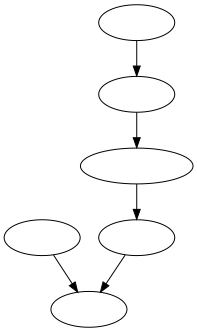

In [292]:
sentence2tree(sentences[7])

In [318]:
def walk_path_idx(i_chunk, sentence, carry):
    carry.append(i_chunk)
    dst = sentence[i_chunk].dst
    if dst == -1:
        return carry
    else:
        return walk_path_idx(dst, sentence, carry)

def get_paths_from_noun(sentence):
    return [
        walk_path_idx(i_chunk, sentence, [])
        for i_chunk in range(len(sentence))
        if '名詞' in map(lambda m: m.pos, sentence[i_chunk].morphs)
    ]

import itertools

def print_chunk_with_noun_repl(sentence, i_chunk, repl_dict):
    if i_chunk not in repl_dict:
        return sentence[i_chunk].wo_signs().surface
    morphs = sentence[i_chunk].wo_signs().morphs
    
    # 「人間中」など、名詞が連続する表現は「YY」として出力せずに1つのYにまとめる
    cum = ''
    repl_done = False
    for m in morphs:
        if m.pos == '名詞':
            if not repl_done:
                cum += repl_dict[i_chunk]
                repl_done = True
            else:
                pass
        else:
            cum += m.surface
            repl_done = False
    return cum

lines = []
for sentence in sentences:
    paths_from_noun = get_paths_from_noun(sentence)
    for path_i, path_j in itertools.combinations(paths_from_noun, 2):
        assert path_i[0] < path_j[0]
                
        # 文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示
        if path_j[0] in path_i:
            idx_j_in_path_i = path_i.index(path_j[0])
            path_i_to_j = path_i[:idx_j_in_path_i + 1]
            # 出力例を見ると文節jは助詞等を取り除いているので、それに倣う
            lines.append(" -> ".join(
                list(map(lambda i: print_chunk_with_noun_repl(sentence, i, {path_i[0]: 'X'}), path_i_to_j[:-1])) + ['Y', ]
            ))
        # 上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 
        # 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を"|"で連結して表示
        else:
            path_i_to_k = list(itertools.takewhile(lambda x: x not in path_j, path_i))
            path_j_to_k = list(itertools.takewhile(lambda x: x not in path_i, path_j))
            k = path_i[len(path_i_to_k)]
            assert k == path_j[len(path_j_to_k)]
            lines.append(" | ".join([
                " -> ".join(map(lambda i: print_chunk_with_noun_repl(sentence, i, {path_i[0]: 'X'}), path_i_to_k)),
                " -> ".join(map(lambda i: print_chunk_with_noun_repl(sentence, i, {path_j[0]: 'Y'}), path_j_to_k)),
                sentence[k].wo_signs().surface
            ]))

with open('out_chapter5_49.txt', 'w') as f:
    for line in lines:
        print(line, file=f)


In [319]:
!head -30 out_chapter5_49.txt

Xは -> Y
Xで -> 生れたか | Yが | つかぬ
Xでも -> 薄暗い -> Y
Xでも -> 薄暗い -> 所で | Y | 泣いて
Xでも -> 薄暗い -> 所で -> 泣いて | Yだけは | 記憶している
Xでも -> 薄暗い -> 所で -> 泣いて -> Y
Xで | Y | 泣いて
Xで -> 泣いて | Yだけは | 記憶している
Xで -> 泣いて -> Y
X -> 泣いて | Yだけは | 記憶している
X -> 泣いて -> Y
Xだけは -> Y
Xは | Yで -> 始めて -> 人間という -> ものを | 見た
Xは | Yという -> ものを | 見た
Xは | Yを | 見た
Xで -> 始めて -> Y
Xで -> 始めて -> 人間という -> Y
Xという -> Y
Xで -> 聞くと | Yは | 種族であったそうだ
Xで -> 聞くと | Yという -> 人間中で | 種族であったそうだ
Xで -> 聞くと | Yで | 種族であったそうだ
Xで -> 聞くと | Y -> 獰悪な | 種族であったそうだ
Xで -> 聞くと | Yな | 種族であったそうだ
Xで -> 聞くと -> Y
Xは | Yという -> 人間中で | 種族であったそうだ
Xは | Yで | 種族であったそうだ
Xは | Y -> 獰悪な | 種族であったそうだ
Xは | Yな | 種族であったそうだ
Xは -> Y
Xという -> Y
